# Tutorial of Node Schematas - PI & TwoSymbol
Visualization of schematas for simple boolean nodes (automatas)

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from __future__ import division
import numpy as np
import pandas as pd
from IPython.display import Image, display
import cana
from cana.datasets.bools import *
from cana.drawing.canalizing_map import draw_canalizing_map_graphviz

<BNode(id=0, name='OR', k=2, inputs=[1,2], state=0, outputs=[0,1,1,1] constant=0)>
k_r: 0.38 - 0.38
k_e: 0.62 - 0.62
r_ji: [0.375, 0.375] (mean)
e_ji: [0.625, 0.625] (mean)


Original LUT      PI Schema      TS Schema     
           In: Out:       In: Out:       In: Out:
0           00    0        00    0        00    0
1           01    1        1#    1      #̊1̊    1
2           10    1        #1    1         -    -
3           11    1         -    -         -    -

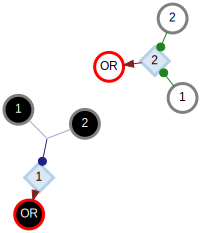

In [4]:
n = OR()
print(n)
print('k_r: {:.2f} - {:.2f}'.format(n.input_redundancy(bound='upper'), n.input_redundancy(bound='lower')))
print('k_e: {:.2f} - {:.2f}'.format(n.effective_connectivity(bound='upper'), n.effective_connectivity(bound='lower')))
#print('k_s: {:.2f} - {:.2f}'.format(n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print('r_ji: {:} (mean)'.format(n.edge_redundancy(bound='mean')))
print('e_ji: {:} (mean)'.format(n.edge_effectiveness(bound='mean')))

dfLUT, dfPI, dfTS = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TS Schema':dfTS}, axis=1).fillna('-'))
draw_canalizing_map_graphviz(n.canalizing_map())

<BNode(id=0, name='Con', k=2, inputs=[1,2], state=0, outputs=[0,0,0,0] constant=1)>
k_r: 1.00 - 1.00
k_e: 0.00 - 0.00
r_ji: [1.0, 1.0] (mean)
e_ji: [0.0, 0.0] (mean)


Original LUT      PI Schema      TS Schema     
           In: Out:       In: Out:       In: Out:
0           00    0        ##    0        ##    0
1           01    0         -    -         -    -
2           10    0         -    -         -    -
3           11    0         -    -         -    -

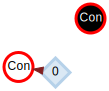

In [5]:
n = CONTRADICTION()
n.name = 'Con'
print(n)
print('k_r: {:.2f} - {:.2f}'.format(n.input_redundancy(bound='upper'), n.input_redundancy(bound='lower')))
print('k_e: {:.2f} - {:.2f}'.format(n.effective_connectivity(bound='upper'), n.effective_connectivity(bound='lower')))
#print('k_s: {:.2f} - {:.2f}'.format(n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print('r_ji: {:} (mean)'.format(n.edge_redundancy(bound='mean')))
print('e_ji: {:} (mean)'.format(n.edge_effectiveness(bound='mean')))

dfLUT, dfPI, dfTS = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TS Schema':dfTS}, axis=1).fillna('-'))
draw_canalizing_map_graphviz(n.canalizing_map())

<BNode(id=0, name='XOR', k=2, inputs=[1,2], state=0, outputs=[0,1,1,0] constant=0)>
k_r: 0.00 - 0.00
k_e: 1.00 - 1.00
r_ji: [0.0, 0.0] (mean)
e_ji: [1.0, 1.0] (mean)
TS: 00 | PermIdx: [] | SameIdx: [[0, 1]]
TS: 11 | PermIdx: [] | SameIdx: [[0, 1]]
TS: 01 | PermIdx: [[0, 1]] | SameIdx: []


Original LUT      PI Schema      TS Schema     
           In: Out:       In: Out:       In: Out:
0           00    0        00    0        00    0
1           01    1        11    0        11    0
2           10    1        01    1      0̊1̊    1
3           11    0        10    1         -    -

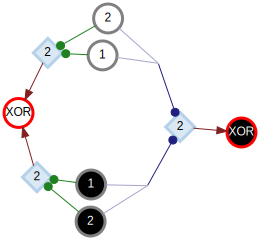

In [6]:
n = XOR()
print(n)
print('k_r: {:.2f} - {:.2f}'.format(n.input_redundancy(bound='upper'), n.input_redundancy(bound='lower')))
print('k_e: {:.2f} - {:.2f}'.format(n.effective_connectivity(bound='upper'), n.effective_connectivity(bound='lower')))
#print('k_s: {:.2f} - {:.2f}'.format(n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print('r_ji: {:} (mean)'.format(n.edge_redundancy(bound='mean')))
print('e_ji: {:} (mean)'.format(n.edge_effectiveness(bound='mean')))

# Manually request Two-Symbol to be computed.
n._check_compute_canalization_variables(two_symbols=True)

for input in [0,1]:
    for ts,per,sms in n._two_symbols[input]:
        print( 'TS: %s | PermIdx: %s | SameIdx: %s' % (ts, per,sms))
dfLUT, dfPI, dfTS = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TS Schema':dfTS}, axis=1).fillna('-'))
draw_canalizing_map_graphviz(n.canalizing_map())

<BNode(id=0, name='AND', k=2, inputs=[1,2], state=0, outputs=[0,0,0,1] constant=0)>
k_r: 0.38 - 0.38
k_e: 0.62 - 0.62
r_ji: [0.375, 0.375] (mean)
e_ji: [0.625, 0.625] (mean)


Original LUT      PI Schema      TS Schema     
           In: Out:       In: Out:       In: Out:
0           00    0        0#    0      #̊0̊    0
1           01    0        #0    0        11    1
2           10    0        11    1         -    -
3           11    1         -    -         -    -

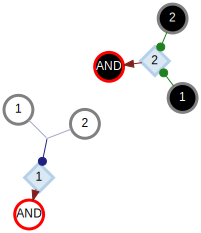

In [7]:
n = AND()
print(n)
print('k_r: {:.2f} - {:.2f}'.format(n.input_redundancy(bound='upper'), n.input_redundancy(bound='lower')))
print('k_e: {:.2f} - {:.2f}'.format(n.effective_connectivity(bound='upper'), n.effective_connectivity(bound='lower')))
#print('k_s: {:.2f} - {:.2f}'.format(n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print('r_ji: {:} (mean)'.format(n.edge_redundancy(bound='mean')))
print('e_ji: {:} (mean)'.format(n.edge_effectiveness(bound='mean')))

dfLUT, dfPI, dfTS = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TS Schema':dfTS}, axis=1).fillna('-'))
draw_canalizing_map_graphviz(n.canalizing_map())

<BNode(id=0, name='Cx1', k=2, inputs=[1,2], state=0, outputs=[0,0,1,1] constant=0)>
k_r: 0.50 - 0.50
k_e: 0.50 - 0.50
r_ji: [0.0, 1.0] (mean)
e_ji: [1.0, 0.0] (mean)


Original LUT      PI Schema      TS Schema     
           In: Out:       In: Out:       In: Out:
0           00    0        0#    0        0#    0
1           01    0        1#    1        1#    1
2           10    1         -    -         -    -
3           11    1         -    -         -    -

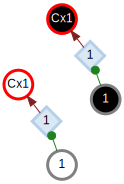

In [8]:
n = COPYx1()
n.name = 'Cx1'
print(n)
print('k_r: {:.2f} - {:.2f}'.format(n.input_redundancy(bound='upper'), n.input_redundancy(bound='lower')))
print('k_e: {:.2f} - {:.2f}'.format(n.effective_connectivity(bound='upper'), n.effective_connectivity(bound='lower')))
#print('k_s: {:.2f} - {:.2f}'.format(n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print('r_ji: {:} (mean)'.format(n.edge_redundancy(bound='mean')))
print('e_ji: {:} (mean)'.format(n.edge_effectiveness(bound='mean')))

dfLUT, dfPI, dfTS = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TS Schema':dfTS}, axis=1).fillna('-'))
draw_canalizing_map_graphviz(n.canalizing_map())

<BNode(id=0, name='R90', k=3, inputs=[1,2,3], state=0, outputs=[0,1,0,1,1,0,1,0] constant=0)>
k_r: 0.33 - 0.33
k_e: 0.67 - 0.67
r_ji: [0.0, 1.0, 0.0] (mean)
e_ji: [1.0, 0.0, 1.0] (mean)


Original LUT      PI Schema      TS Schema     
           In: Out:       In: Out:       In: Out:
0          000    0       0#0    0       0#0    0
1          001    1       1#1    0       1#1    0
2          010    0       0#1    1     0̊#1̊    1
3          011    1       1#0    1         -    -
4          100    1         -    -         -    -
5          101    0         -    -         -    -
6          110    1         -    -         -    -
7          111    0         -    -         -    -

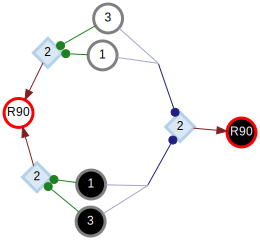

In [10]:
n = RULE90()
n.name = 'R90'
print(n)
print('k_r: {:.2f} - {:.2f}'.format(n.input_redundancy(bound='upper'), n.input_redundancy(bound='lower')))
print('k_e: {:.2f} - {:.2f}'.format(n.effective_connectivity(bound='upper'), n.effective_connectivity(bound='lower')))
#print('k_s: {:.2f} - {:.2f}'.format(n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print('r_ji: {:} (mean)'.format(n.edge_redundancy(bound='mean')))
print('e_ji: {:} (mean)'.format(n.edge_effectiveness(bound='mean')))

dfLUT, dfPI, dfTS = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TS Schema':dfTS}, axis=1).fillna('-'))
draw_canalizing_map_graphviz(n.canalizing_map())

<BNode(id=0, name='R110', k=3, inputs=[1,2,3], state=0, outputs=[0,1,1,1,0,1,1,0] constant=0)>
k_r: 0.29 - 0.29
k_e: 0.71 - 0.71
r_ji: [0.625, 0.125, 0.125] (mean)
e_ji: [0.375, 0.875, 0.875] (mean)


Original LUT      PI Schema      TS Schema     
           In: Out:       In: Out:       In: Out:
0          000    0       #00    0       111    0
1          001    1       111    0       #00    0
2          010    1       01#    1     #̊0̊1    1
3          011    1       #01    1     0#̊1̊    1
4          100    0       #10    1     #0̊1̊    1
5          101    1       0#1    1     0̊1#̊    1
6          110    1         -    -         -    -
7          111    0         -    -         -    -

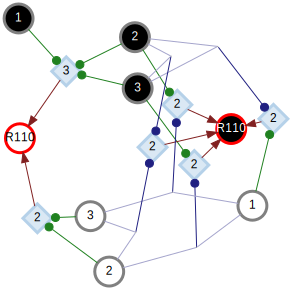

In [11]:
n = RULE110()
n.name = 'R110'
print(n)
print('k_r: {:.2f} - {:.2f}'.format(n.input_redundancy(bound='upper'), n.input_redundancy(bound='lower')))
print('k_e: {:.2f} - {:.2f}'.format(n.effective_connectivity(bound='upper'), n.effective_connectivity(bound='lower')))
#print('k_s: {:.2f} - {:.2f}'.format(n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print('r_ji: {:} (mean)'.format(n.edge_redundancy(bound='mean')))
print('e_ji: {:} (mean)'.format(n.edge_effectiveness(bound='mean')))

dfLUT, dfPI, dfTS = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TS Schema':dfTS}, axis=1).fillna('-'))
draw_canalizing_map_graphviz(n.canalizing_map())